# Trabajo Practico - Desarrollo de software para el cálculo de parámetros acústicos ISO 3382 (1er entrega)

## Fecha de entrega

*Ingresar fecha*

## Integrantes

* Juan, Aldrey
* Nicolás Ariel, Fontenla
* Ezequiel Nicolás, Bordone

## Aspectos generales del notebook

* Todas las funciones deben contar con su [docstring](https://realpython.com/documenting-python-code/#docstring-types), como figura en la funcion de ejemplo (`ruidoRosa_voss`).
* Todos los gráficos deben tener correctamente etiquetados los ejes.
* Enviar el notebook (.ipynb) (con las celdas ejecutas) y todos los archivos para reproducir los resultados por Slack.
* Todas las señales de audio deben ser generadas en formato .wav en una función nueva.

## Librerias utilizadas
Agregar todas las librerias utilizadas, algunas a modo de ejemplo:

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.io import wavfile
import pyaudio
import sounddevice as sd
import soundfile as sf

## Función de sintetización de ruido rosa
El ruido rosa o ruido $\frac{1}{\sqrt{f}}$ , dónde $f$ denota frecuencia en Hz, es un ruido con una distribución de frecuencias tal que su densidad espectral de potencia es proporcional a la inversa de la frecuencia. Esto implica que su nivel, por bandas de tercio de octava, es constante. El nivel del ruido rosa por intervalo fijo de frecuencias va decayendo a razón de 3 dB/octava, de forma no lineal aunque las frecuencias se representan en un eje lineal.

![Espectro del ruido rosa](media/image44.png)

<center><b>Fig 1.</b> Espectro del ruido rosa.</center>

Se adjunta a continuación una función que devuelva un ruido rosa sintetizado a partir del algoritmo de Voss y Clarke (pueden encontrar mas informacion en [este enlace](https://www.dsprelated.com/showabstract/3933.php) y en [este notebook](https://github.com/AllenDowney/ThinkDSP/blob/master/code/voss.ipynb)). 

**Consigna:** modificar la función original para que reciba como parametro la duración del ruido en segundos $t$ y como parametro opcional la frecuencia de muestreo $fs$ (Ayuda: la longitud de la señal sera el producto entre ambos). La función debe guardar el archivo de audio .wav de la señal generada y devolver el vector de datos de la señal.

In [2]:
def ruidoRosa_voss_v2(t, fs=44100):
    """
    Genera ruido rosa utilizando el algoritmo de Voss-McCartney(https://www.dsprelated.com/showabstract/3933.php).
    
    .. Nota:: si 'ruidoRosa.wav' existe, este será sobreescrito
    
    Parametros
    ----------
    t : float
        Valor temporal en segundos, este determina la duración del ruido generado.
    fs: int
        Frecuencia de muestreo en Hz de la señal. Por defecto el valor es 44100 Hz.
    
    returns: NumPy array
        Datos de la señal generada.
    
    Ejemplo
    -------
    Generar un `.wav` desde un numpy array de 10 segundos con ruido rosa a una 
    frecuencia de muestreo de 44100 Hz.
    
        import numpy as np
        import soundfile as sf
        from scipy import signal
        
        ruidoRosa_voss(10)
    """
    nrows = fs * t
    ncols = 16
    array = np.full((nrows, ncols), np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # el numero total de cambios es nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)
    
    df = pd.DataFrame(array)
    filled = df.fillna(method='ffill', axis=0)
    total = filled.sum(axis=1)
    
    ## Centrado de el array en 0
    total = total - total.mean()
    
    ## Normalizado
    valor_max = max(abs(max(total)),abs(min(total)))
    total = total / valor_max
    
    # Agregar generación de archivo de audio .wav
    wavfile.write("media/ruidoRosa.wav", fs, np.int16(total * 32767))
    return total

Llamar la función.

In [3]:
# completar
ruidoRosa = ruidoRosa_voss_v2(10)


C:\Users\ezequ\AppData\Local\Temp\ipykernel_8644\1158485290.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled = df.fillna(method='ffill', axis=0)


Realizar una función para visualizar el dominio temporal de la señal.

In [4]:
# completar
def dominioTemporal(señal, fs=44100):
    vectorTemporal = np.arange(0, len(señal) * 1/fs, 1/fs) # donde 1/fs es el periodo se sampleo, es decir el tiempo entre muestras
    plt.plot(vectorTemporal, señal)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Ruido Rosa')
    plt.grid(True)
    plt.show()

Llamar a la función.

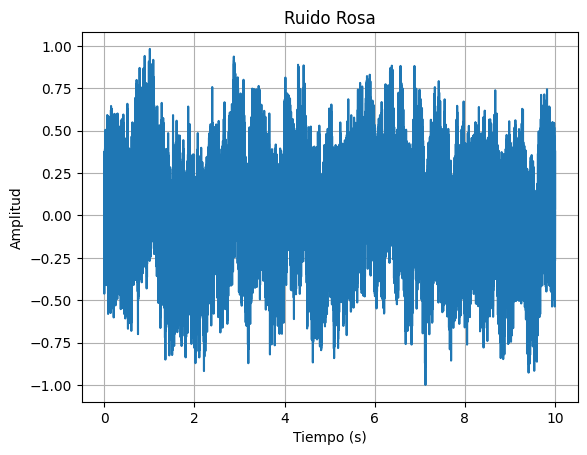

In [5]:
# completar
dominioTemporal(ruidoRosa)

Graficar el dominio espectral del resultado utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

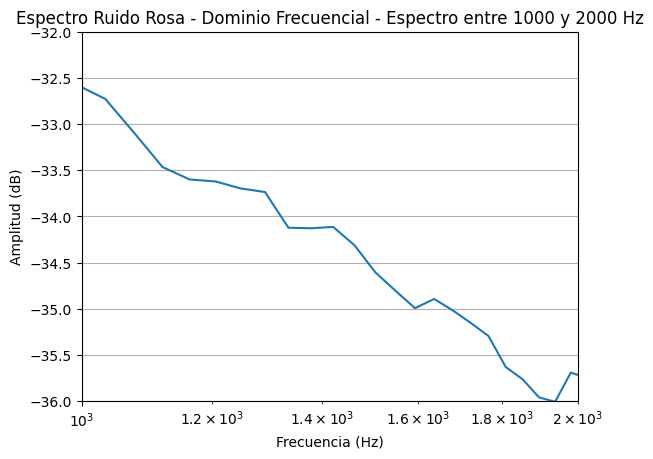

In [6]:
# OPCION INTERACTIVA PARA COMPARAR DOS FRECUENCIAS SEPARADAS POR UNA OCTAVA
df = pd.read_csv("media/espectro-ruido-rosa.txt", sep='\t', skiprows=1, header=None)

while True:
    opcion = input("Si desea ver el espectro entre 1000 y 2000 hz pulse (y)").lower()
    if opcion in ('y'):
        plt.plot(df.iloc[:, 0], df.iloc[:, 1])
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Amplitud (dB)')
        plt.xscale('log')
        plt.xlim(1000, 2000)
        plt.ylim(-36,-32)
        plt.title('Espectro Ruido Rosa - Dominio Frecuencial - Espectro entre 1000 y 2000 Hz')
        plt.grid(True)
        plt.show()
        break
    else:
        plt.plot(df.iloc[:, 0], df.iloc[:, 1])
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Amplitud (dB)')
        plt.xscale('log')
        plt.title('Espectro Ruido Rosa - Dominio Frecuencial')
        plt.grid(True)
        plt.show()
        break
      

    Frequency (Hz)  Level (dB)
23      1033.59375  -32.729717


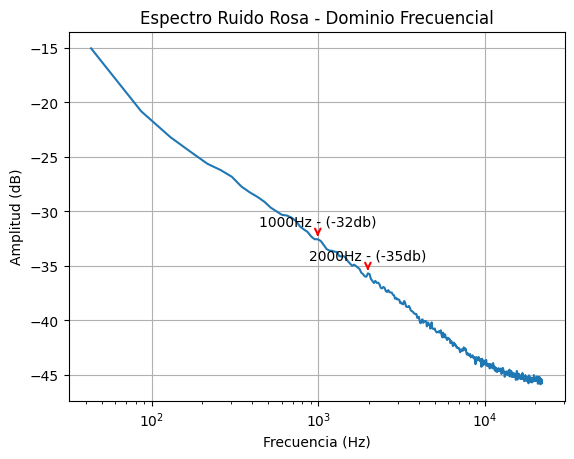

In [25]:
# OPCION NORMAL SIN COMPARACION
df = pd.read_csv("media/espectro-ruido-rosa.txt", sep='\t', header=0)
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
print(df[df['Frequency (Hz)'] == 1033.593750])
plt.annotate("1000Hz - (-32db)", (990.527344, -32.566341), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.annotate("2000Hz - (-35db)", (1981.054688, -35.690636), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.xscale('log')
plt.title('Espectro Ruido Rosa - Dominio Frecuencial')
plt.grid(True)
plt.show()

Reproducir resultado.

In [8]:
# Reproducir ruido rosa
sd.play(ruidoRosa)
sd.wait()

> Solo a modo de comentario, un **método alternativo** es utilizando un filtro en el siguiente [link](https://ccrma.stanford.edu/~jos/sasp/Example_Synthesis_1_F_Noise.html) se presenta la implementación en Matlab/Octave.

## Funcion de generación de sine sweep logaritmico + filtro inverso
El sine sweep es el método más indicado para generar el impulso por medio de la convolución (Nikolić, I., and O. H. Bjor, 2003). Dado que métodos tales como: explosión de globo, aplauso, disparo con pistola se salva, paper gun ([Paper Popper](https://en.wikipedia.org/wiki/Paper_popper)), golpe entre maderas, petardos, entre otros, carecen de reproducibilidad. Esto es debido a su nivel sonoro, duración y características espectrales, además de una muy baja relación señal ruido, la cual difícilmente se solucione filtrando o promediando con muchas mediciones. Comencemos por ver cómo generar el sine sweep logarítmico $x(t)$ que posee la siguiente forma:

\begin{equation}
f(x) = \sin[\theta(t)]= \sin[K (e^\frac{t}{L} - 1) ]
\tag{1}
\end{equation}

Donde:

\begin{equation}
K = \frac{T w_{1}}{R}
\end{equation}

\begin{equation}
L = \frac{T}{R}
\end{equation}

y el sweep rate $R$: 

\begin{equation}
R = \ln \left( \frac{w_{2}}{w_{1}} \right)
\tag{2}
\end{equation}

Con $w_{1}$ y $w_{2}$, las frecuencias angulares inferior y superior respectivamente, $T$ es el tiempo de duración del sine sweep en segundos (Meng, Q., 2008). Si estudiamos el espectro de la señal de la ecuación (1), se observa que no es plano, sino que disminuye a razón de -3 dB/octava, como el ruido rosa (Ver fig. 2, sup). De modo que el espectro de $x(-t)$ debe ser ajustado, aumentando en 3 dB/octava, de modo que cuando realizamos el cálculo se restaure la plenitud perfecta de la respuesta de impulso medida $h(t)$ (Farina A., 2000) (Ver fig. 2, inf).

![](media/image43.png)
<center><b>Fig 2.</b> Espectro del sine sweep. Sine sweep logarítmico  (sup). Filtro invertido (inf).</center>


En el dominio temporal las señales del sine sweep logarítmico y el filtro inverso se comportan de la siguiente manera (Ver fig. 3). 

![](media/image46.png)
<center><b>Fig 3.</b> Magnitud del sine sweep. Sine sweep logarítmico (sup). Filtro invertido (inf).</center>

Para generar el filtro inverso $k(t)$ del sine sweep logarítmico $x(t)$ se requiere de una modulación $m(t)$ definida por la siguiente expresión:

\begin{equation}
m(t) = \frac{w_{1}}{2\pi w(t)}
\tag{3}
\end{equation}

Obtenida de la frecuencia instantánea (dado que la amplitud cambia en función de la
frecuencia), calculada a partir de la ecuación (1):

\begin{equation}
w(t)=\frac{d[\theta (t)]}{dt}=\frac{K}{L} e^\frac{t}{L}
\tag{4}
\end{equation}
m
entonces, el filtro inverso $k(t)$ queda definido como:

\begin{equation}
k(t)=m(t)x(-t)
\tag{5}
\end{equation}

**Consigna:** realizar una función generadora de un sine sweep y su filtro inverso, a partir de las ecuaciones descriptas anteriormente, y graficar el resultado de ambos filtros, usando la función anteriormente creada. Recordar almacenar los audios. Agregar docstring que indique claramente los parametros de entrada y salida.

In [9]:
# Completar

def generarSineSweepYFiltroInverso(finf, fsup, t0):
    wi = 2*np.pi*finf
    ws = 2*np.pi*fsup

    R = np.log(ws/wi)
    K = (t0*wi)/R
    L = t0/R
    fs = 44100
    t = np.linspace(0,t0,t0*fs)

    # Definición del sine sweep
    sine_sweep = np.sin(K*(np.exp(t/L)-1))
    sine_sweep = sine_sweep * 0.5 # para equiparar las amplitudes del sine sweep y el filtro inverso

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(t, sine_sweep)
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Sine Sweep')
    ax1.grid(True)

    # Definición de la modulacion
    m = wi/(2*np.pi*(K/L)*np.exp(t/L))  # (K/L)*math.exp(t/L) = w(t) en la consigna

    # Definición del filtro inverso
    filtro_inverso = m*sine_sweep[::-1]
    filtro_inverso = filtro_inverso * 5 # para equiparar las amplitudes del sine sweep y el filtro inverso

    ax2.plot(t, filtro_inverso)
    ax2.set_ylabel('Amplitud')
    ax2.set_title('Filtro Inverso')
    ax2.grid(True)

    plt.xlabel('Tiempo (s)')
    fig.suptitle('Sine Sweep y Filtro Inverso - Dominio Temporal')

    wavfile.write("media/sine-sweep.wav", fs, np.int16(sine_sweep * 32767))
    wavfile.write("media/filtro-inverso.wav", fs, np.int16(filtro_inverso * 32767))

    return (sine_sweep, filtro_inverso, t)


Llamar la función.

(array([ 0.        ,  0.00142479,  0.0028496 , ...,  0.29196328,
        -0.16266498,  0.01962168]),
 array([ 1.56144351e-02, -1.29440625e-01,  2.32322438e-01, ...,
         2.26778483e-06,  1.13384374e-06,  0.00000000e+00]),
 array([0.00000000e+00, 2.26758398e-05, 4.53516796e-05, ...,
        4.99995465e+00, 4.99997732e+00, 5.00000000e+00]))

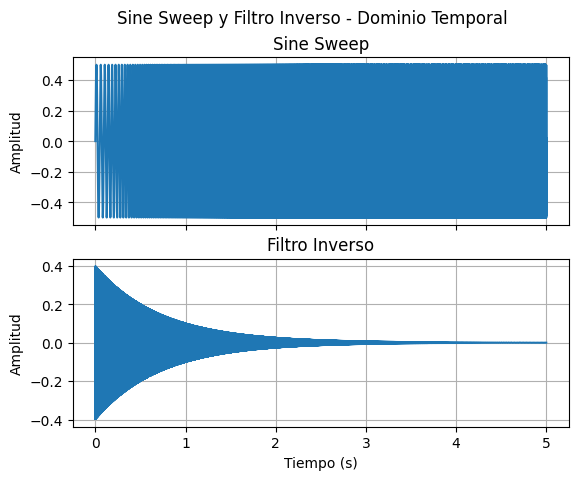

In [10]:
# completar
generarSineSweepYFiltroInverso(20, 20000, 5)

Graficar el dominio espectral del resultado utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

(500, 15000)

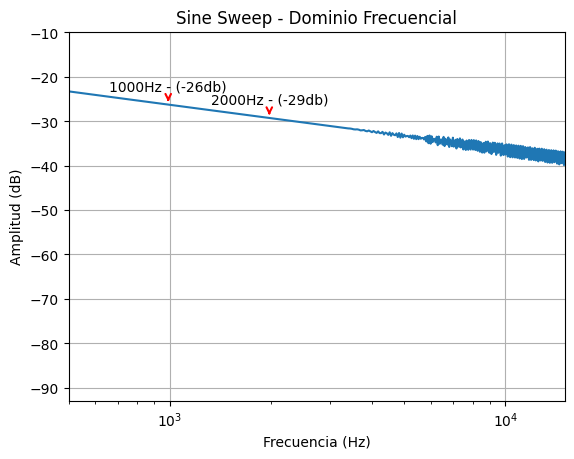

In [27]:
# completar 
dfSineSweep = pd.read_csv("media/espectro-sine-sweep.txt", sep='\t', skiprows=1, header=None)

plt.show()

fig, (ax1) = plt.subplots(1, 1, sharex=True)
ax1.plot(dfSineSweep.iloc[:, 0], dfSineSweep.iloc[:, 1])
ax1.set_ylabel('Amplitud (dB)')
ax1.set_title('Sine Sweep - Dominio Frecuencial')
ax1.grid(True)

plt.xlabel('Frecuencia (Hz)')
plt.xscale('log')
plt.annotate("1000Hz - (-26db)", (990.527344, -26.247152), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.annotate("2000Hz - (-29db)", (1981.054688, -29.259508), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.xlim(500,15000)
#plt.ylim(-30,-25)

(500, 15000)

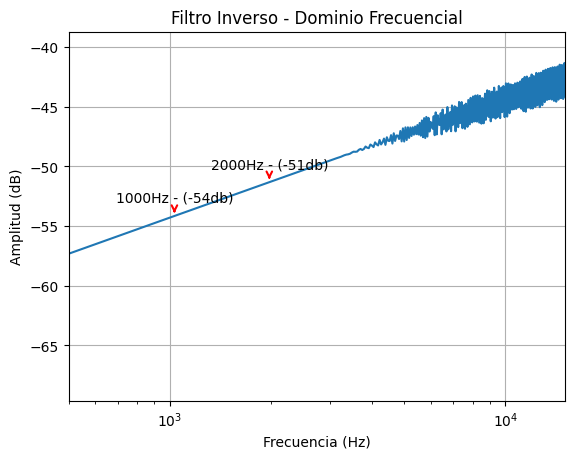

In [28]:
dfFiltroInverso = pd.read_csv("media/espectro-filtro-inverso.txt", sep='\t', skiprows=1, header=None)

plt.show()

fig, (ax2) = plt.subplots(1, 1, sharex=True)
ax2.plot(dfFiltroInverso.iloc[:, 0], dfFiltroInverso.iloc[:, 1])
ax2.set_ylabel('Amplitud (dB)')
ax2.set_title('Filtro Inverso - Dominio Frecuencial')
ax2.grid(True)

plt.xlabel('Frecuencia (Hz)')
plt.xscale('log')
plt.annotate("1000Hz - (-54db)", (1033.593750, -54.160511), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.annotate("2000Hz - (-51db)", (1981.054688, -51.331120), textcoords="offset points", xytext=(0, 10), ha='center', arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
plt.xlim(500,15000)
#plt.ylim(-55,-50)

Reproducir resultados.

In [13]:
# Reproducir sine sweep
data, samplerate = sf.read('media/sine-sweep.wav')
sd.play(data, samplerate)
# Reproducir filtro inverso
data, samplerate = sf.read('media/filtro-inverso.wav')
sd.play(data, samplerate)

## Función adquisicion y reproducción
**Consigna**: la función tiene que permitir la reproducción y la adquisición de manera simultánea para un tiempo determinado por el usuario. Es importante evaluar y constatar dicha simultaneidad. El módulo debería permitir seleccionar el hardware a utilizar. Algunos articulos de interes para el desarrollo:
* [Clase de audio](../../clases/clase_6/600_audio.ipynb)
* [Sound Device - Simultaneous Playback and Recording](https://python-sounddevice.readthedocs.io/en/0.4.1/usage.html#simultaneous-playback-and-recording)
* [Playing and Recording Sound in Python](https://realpython.com/playing-and-recording-sound-python/)
* [Audio in Python](https://wiki.python.org/moin/Audio/)
* [https://github.com/spatialaudio/python-sounddevice/issues/148](https://github.com/spatialaudio/python-sounddevice/issues/148)

In [14]:
def adquisicion_reproduccion():
    pyaudio_instance = pyaudio.PyAudio()
    device_count = pyaudio_instance.get_device_count()

    print("Dispositivos de audio disponibles:")
    for i in range(device_count):
        device_info = pyaudio_instance.get_device_info_by_index(i)
        print(f"{i}: {device_info['name']}")


    selected_input_device_index = int(input("Selecciona el número del dispositivo de entrada de audio: "))
    selected_input_device = pyaudio_instance.get_device_info_by_index(selected_input_device_index)

    selected_output_device_index = int(input("Selecciona el número del dispositivo de salida de audio: "))
    selected_output_device = pyaudio_instance.get_device_info_by_index(selected_output_device_index)

    seconds = int(input("Ingrese la cantidad de segundos para la duración de la experiencia de adquisicion y reproducción: "))

    input_stream = pyaudio_instance.open(
        channels=1,   
        format=pyaudio.paInt16, 
        input=True, 
        input_device_index=selected_input_device_index, 
        rate=int(selected_input_device['defaultSampleRate']), 
        frames_per_buffer=1024
    )

    output_stream = pyaudio_instance.open(
        channels=1,   
        format=pyaudio.paInt16, 
        output=True, 
        output_device_index=selected_output_device_index, 
        rate=int(selected_output_device['defaultSampleRate']), 
        frames_per_buffer=1024
    )

    for i in range(0, int(selected_input_device['defaultSampleRate'] / 1024 * seconds)):
        data = input_stream.read(1024)
        output_stream.write(data)

    input_stream.stop_stream()
    input_stream.close()

    output_stream.stop_stream()
    output_stream.close()
    
    pyaudio_instance.terminate()



Llamar la función.

In [15]:

adquisicion_reproduccion()

Dispositivos de audio disponibles:
0: Asignador de sonido Microsoft - Input
1: MicrÃ³fono (Realtek(R) Audio)
2: Asignador de sonido Microsoft - Output
3: Altavoces (Realtek(R) Audio)
4: Controlador primario de captura de sonido
5: MicrÃ³fono (Realtek(R) Audio)
6: Controlador primario de sonido
7: Altavoces (Realtek(R) Audio)
8: Altavoces (Realtek(R) Audio)
9: MicrÃ³fono (Realtek(R) Audio)
10: Auriculares con micrÃ³fono (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(TOPHOUSE BS30))
11: Auriculares con micrÃ³fono (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(TOPHOUSE BS30))
12: Speakers 1 (Realtek HD Audio output with SST)
13: Speakers 2 (Realtek HD Audio output with SST)
14: Altavoz de PC (Realtek HD Audio output with SST)
15: Mezcla estÃ©reo (Realtek HD Audio Stereo input)
16: MicrÃ³fono (Realtek HD Audio Mic input)
17: Headphones 1 (Realtek HD Audio 2nd output with SST)
18: Headphones 2 (Realtek HD Audio 2nd output with SST)
19: Altavoz de PC (Realtek HD Audio 2nd outpu

¿Cómo se podría medir la latencia de la función? Agregar un gráfico.

In [57]:
# Completar
import time

def latencia():
    inicio = time.time()
    adquisicion_reproduccion()
    fin = time.time()
    latencia = fin - inicio
    print(f"La latencia de la función es de {latencia} segundos")

latencia()